# Reading and Processing Surface Water Data

Upon completing the data processing for GRACE and GLDAS, we will next shift our focus to the acquisition and analysis of surface water data. Surface water data is gathered via reservoir storage monitoring performed at designated monitoring sites for each reservoir. Contrasting with GRACE and GLDAS, surface water data is typically fragmented and region-specific.

This notebook guides you through the process of downloading and analyzing surface water data specific to the Colorado River Basin. The methodologies demonstrated here could be applied to other regions within the United States, given the broad coverage of our data sources. However, for more detailed data, regional websites and databases may prove beneficial. As for regions outside the United States, this notebook should serve as a useful springboard for scraping, processing, and visualizing surface water data.

Surface water data for the Colorado River Basin is distributed across several platforms including:
- [the Bureau of Reclamation](https://www.usbr.gov/uc/water/hydrodata/nav.html)(Reclamation)
- [the United States Geological Survey](https://waterdata.usgs.gov/nwis/sw)(USGS)
- [the US Army Corps of Engineers](https://resreg.spl.usace.army.mil/cgi-bin/slLatestBasin.cgi?gila+elev)
- [the Salt River Project Watershed Connection](https://streamflow.watershedconnection.com/?location=Apache%20Lake%20(Horse%20Mesa%20Dam)&project=undefined)

In this Jupyter Notebook, however, we will restrict our focus to data from the Reclamation and the USGS for the reasons detailed below:

- Research papers that study the groundwater in the Colorado River Basin frequently use data from Lake Powell and Lake Mead to represent the totality of surface water in the basin. This data is readily provided by the Reclamation and USGS.
- The data from the US Army Corps of Engineers only spans the most recent 180 days and that from the Salt River Project extends up to a year. Given our interest in the timeframe from 2002 to 2023 (the most recent year), the data from these two sources is insufficient.

### As we progress through this notebook, you will be guided through the following steps:

<b>Step I:</b> Download Data
1. From the Reclamation
2. From the USGS

<b>Step II:</b> 
Carry out necessary data cleaning and processing to ensure the data is suitable for analysis.

<b>Step III:</b>
Visualize the storage for reservoirs within the basin.

In [13]:
%pip install fuzzywuzzy
%pip install bokeh

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 7.0 MB 4.5 MB/s eta 0:00:01     |████▊                           | 1.0 MB 8.2 MB/s eta 0:00:01     |██████████████████████████████▍ | 6.7 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 1.3 MB/s eta 0:00:011
     |████████████████████████████████| 433 kB 908 kB/s eta 0:00:01    |██████                          | 81 kB 746 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 8.1 MB/s eta 0:00:01
  Attempting uninstall: tornado
    Found existing installation: tornado 6.1
    Uninstalling tornado-6.1:
      Successfully uninstalled tornado-6.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgradin

In [14]:
# Loading necessary packages
import csv
import numpy as np
import pandas as pd

# Packages to select data inside the basin
import geopandas as gpd
from shapely.geometry import Point

# Packages to scrape website
import requests
from io import StringIO
from requests.exceptions import RequestException
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
from datetime import date
from datetime import timedelta

# Package to compare potentially repetitive data
from fuzzywuzzy import fuzz

# Packages for visualization
import matplotlib.pyplot as plt
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import get_provider, Vendors
from bokeh.palettes import Category10, Category20
import itertools


## Step I(a): Reading data from the Reclamation

The Reclamation hosted a [hydrologic database access portal](https://www.usbr.gov/uc/water/hydrodata/nav.html) for all relevent data on reservoirs they operated in the area of Colorado River Basin. The data we will be using are:
- a [metadata spreadsheet](https://www.usbr.gov/uc/water/hydrodata/reservoir_data/meta.csv) that include the information about monitoring sites (latitude, longitude, site_id, etc)
- reservoir storage data for each monitoring site measured in acre feet

First, we will gather information (including latitude, longitude, site ID, and name) for each monitoring site. Subsequently, we will use this information to collect data on the surface water storage of reservoirs at each of these monitoring sites.

In [15]:
# def read_reclamation_from_url(url):
#     '''
#     Scrape content from the Bureau of Reclamation website
#     '''
#     # Define a session for HTTP requests
#     session = requests.Session()

#     # Define the retry settings: total=5 will attempt the request up to 5 times
#     # status_forcelist=[500, 502, 503, 504] will retry if one of these status codes is returned
#     retries = Retry(total=5, backoff_factor=0.1, status_forcelist=[500, 502, 503, 504])

    # # Mount the retry settings to the session
    # session.mount("https://", HTTPAdapter(max_retries=retries))

    # try:
    #     # Send the request and catch any exceptions
    #     response = session.get(url, timeout=10)
        
    #     # If the response was successful, parse it as CSV
    #     if response.status_code == 200:
    #         data = response.content.decode('utf-8')
    #         return pd.read_csv(StringIO(data))
    #     # If the response was unsuccessful, print the status code for response
    #     else:
    #         print(f"Failed to download file from {url}, status code: {response.status_code}")
    #         return None
    # # If the request to scrape was unsuccessful, print the error message
    # except RequestException as e:
    #     print(f"Failed to download file: {e}")
    #     return None

In [3]:
# Load CRB shapefile
usa_shapefile= gpd.read_file('data/shapefiles/tl_2017_us_state/tl_2017_us_state.shp"')

# Load reservoir data from Bureau of Reclamation
#reclamation_reservoir_metadata = read_reclamation_from_url('https://www.usbr.gov/uc/water/hydrodata/reservoir_data/meta.csv') 

In [4]:
# Convert your DataFrame to a GeoDataFrame
# geometry = [Point(xy) for xy in zip(reclamation_reservoir_metadata['site_metadata.longi'], reclamation_reservoir_metadata['site_metadata.lat'])]
# reservoirs_gdf = gpd.GeoDataFrame(reclamation_reservoir_metadata, geometry=geometry)

# # Assign a Coordinate Reference System (CRS) to your GeoDataFrame. EPSG:4326 represents WGS 84 - Latitude/Longitude.
# reservoirs_gdf.crs = "EPSG:4326"
# usa_shapefile.crs = "EPSG:4326"

# # Perform spatial join so that only reservoirs inside the CRB shapefile will be selected
# joined_gdf = gpd.sjoin(reservoirs_gdf, basin_shapefile, predicate='intersects')

# # Filter by type_id (17 suggests the data is about reservoir storage) and select relevant columns
# reclamation_reservoirs = joined_gdf[joined_gdf['datatype_id'] == 17][['site_metadata.lat', 'site_metadata.longi', 'site_metadata.site_name', 'site_id']]

In [5]:
# Remove duplicated monitoring sites that have the same latitudes, longitudes, name, and site id
# reclamation_reservoirs = reclamation_reservoirs.drop_duplicates().reset_index(drop=True)

# # Rename Columns
# reclamation_reservoirs = reclamation_reservoirs.rename(columns={'site_metadata.site_name':'name', 'site_metadata.lat':'lat', 'site_metadata.longi':'lon'})
# reclamation_reservoirs['name'] = reclamation_reservoirs['name'].str.title()

In [6]:
# Show the first 5 rows of the dataframe
# reclamation_reservoirs.head()

,lat,lon,name,site_id
0,40.365100,-105.236000,Flatiron Reservoir Nr Loveland,100081
1,40.320000,-105.210000,Carter Lake,100065
2,40.600000,-105.170000,Horsetooth Reservoir,100091
3,39.878317,-106.329748,Green Mountain Reservoir,100089
4,39.366647,-106.458926,Homestake Reservoir,100120


Now, we have gathered information including location, name, and site ID for all monitoring sites in the Colorado River Basin, as listed on the Reclamation website. 

Next, we will visualize the distribution of these sites.





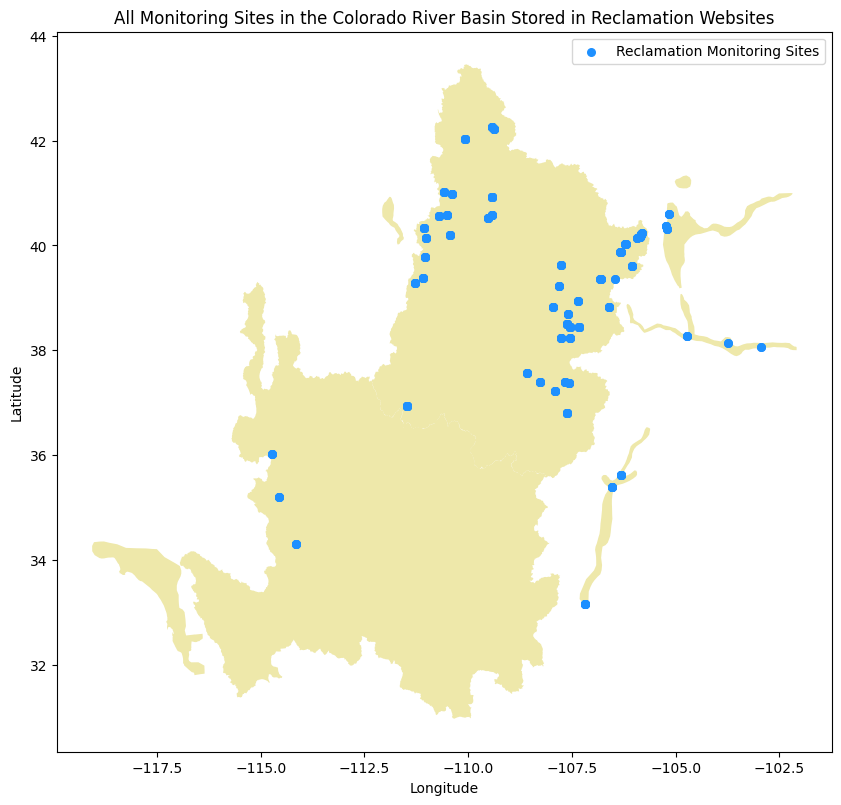

In [7]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the basins
usgs_shapefile.plot(ax=ax, color='palegoldenrod')

# # Plot the reservoirs
# joined_gdf.plot(ax=ax, marker='o', color='dodgerblue', markersize=30, label='Reclamation Monitoring Sites')

# # # Add title and labels
# plt.title('All Monitoring Sites in the Colorado River Basin Stored in Reclamation Websites')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# ax.legend()

# # Show the plot
# plt.show()

In [8]:
# Check if reservoirs have more than one monitoring sites.

# if reclamation_reservoirs['name'].nunique() != len(reclamation_reservoirs):
#     print('There are multiple monitoring sites at some reservoirs')
# else:
#     print("All reservoirs have only one monitoring site for each in Reclamation.")

There are multiple monitoring sites at some reservoirs


After we collected the information for each monitoring site stored in the Reclamation website, we can use the site_id associated with them to scrape the surface water storage of each monitoring site.

In [9]:
# # URL link to each reservoir's storage data
# reclamation_url_head = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/'
# reclamation_url_tail = '/csv/17.csv'

# # Create an empty list to store all the temporary dataframes
# reclamation_data_list = []

# # Iterate over each row in the reservoir dataframe to scrape the storage data at each monitoring site
# for row in reclamation_reservoirs.itertuples(index=False):
#     lat, lon, name, id = row
#     # Scrape the website
#     data = read_reclamation_from_url(reclamation_url_head + str(id) + reclamation_url_tail)
#     data = data.rename(columns={'storage':'storage_acrefeet'})

#     # Add columns that documents the monitoring well's latitude, longitude, and name
#     data['lat'] = lat
#     data['lon'] = lon
#     data['name'] = name

#     #Store each dataframe of the monitoring sites into a list
#     reclamation_data_list.append(data)

# # Creating a dataframe from the list
# reclamation_df = pd.concat(reclamation_data_list).reset_index(drop=True)

## Step I(b): Reading data from the USGS

The process of reading data from the USGS is similar to the process of reading data from the Reclamation. 

We first gathered information for all monitoring sites located in the Colorado River Basin stored in the USGS website following the steps below:
1. We select monitoring sites in USGS by filtering all the sites meeting our criteria using [this website](https://waterdata.usgs.gov/nwis/dv?referred_module=sw&search_criteria=search_site_no&search_criteria=site_tp_cd&submitted_form=introduction)

2. Specifically, we selected monitoring sites fulfilling the following conditions:
 - their site id starting with 09. This denotes the monitoring site is in the Colorado River Basin. A list of site ids with the associated areas can be found in [this website](https://help.waterdata.usgs.gov/faq/sites/do-station-numbers-have-any-particular-meaning)
 - they have reservoir storage, acre-ft as the available parameter
3. Then, we choose the output format option " Site-description information displayed in tab-separated format" and select site identification number, site name, site type, Decimal latitude, Decimal longitude as the fileds to include in the site-description output.

We can then use [the website](https://waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no=09&search_site_no_match_type=beginning&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00054=1&group_key=county_cd&format=sitefile_output&sitefile_output_format=rdb&column_name=site_no&column_name=station_nm&column_name=site_tp_cd&column_name=dec_lat_va&column_name=dec_long_va&range_selection=days&period=365&date_format=YYYY-MM-DD&rdb_compression=file&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection) resulted from these steps to scrape the information.




In [49]:
# Below is the function designed to scrape the necessary information about all the monitoring sites in the Colorado River Basin as maintained by the USGS
def read_usgs_monitoring_sites(url):
    
    response = requests.get(url)
    file_content = response.text

    # Get the line number where data starts
    start_pos = file_content.find("site_no\tstation_nm\tsite_tp_cd\tdec_lat_va\tdec_long_va\tcoord_acy_cd\tdec_coord_datum_cd")

    # Extract data from start line till end
    data_content = file_content[start_pos:]

    # Create a pandas dataframe
    df = pd.read_csv(StringIO(data_content), delimiter='\t')
    df = df.drop(0)

    # Select only the columns of interest
    df = df[['dec_lat_va', 'dec_long_va','station_nm','site_no']]
    df['station_nm'] = df['station_nm'].str.title()
    df = df.rename(columns={'site_no':'site_id', 'station_nm':'name', 'dec_lat_va':'lat', 'dec_long_va':'lon'})

    return df

In [50]:
# Below is the function designed to retrieve surface water storage (reservoir storage) information from the relevant websites
def read_usgs_storage(url):
    
    response = requests.get(url)
    file_content = response.text

    # Get the line number where data starts
    start_pos = file_content.find("agency_cd\tsite_no\tdatetime\t")

    # Extract data from start line till end
    data_content = file_content[start_pos:]

    try:
        # Create a pandas dataframe
        df = pd.read_csv(StringIO(data_content), delimiter='\t')
        df = df.drop(0)
    except pd.errors.EmptyDataError:
        # No data to parse from the file, return None
        return None
    
    # Extract columns of the format 'ddddd_00054_ddddd' (any length of d, d stands for digits)
    # These columns records the surface water storage measured by the monitoring sites
    # The parameter code 00054 denotes reservoir storage 
    pattern = r'^\d+_00054_\d+$'  # regex pattern to match the desired column format
    matched_columns = df.filter(regex=pattern).columns

    # Reservoir storage could be stored as daily mean, exact measurement at 8:00 am, exact measurement at midnight, or instantaneous measurement
    # These are denoted by the chunk of digits following 00054
    
    '''
    ddddd_00054_32400: Reservoir storage at midnight
    ddddd_00054_00011: Instantaneous Reservoir storage
    ddddd_00054_00003: Daily mean of Reservoir storage
    ddddd_00054_30800: Reservoir storage at 8 am
    '''
     
    # Most of the monitoring sites only record one type of observation 
    # For monitoring sites with multiple types of observations, we select only one type of observation to record based on the following order. You can choose any other that makes sense for your analysis
    # In this case, observation type 00003 (Daily mean of Reservoir storage) receive the highest order
    column_order = ['00003', '32400', '30800', '00011']

    # Select the first column that exists in the DataFrame according to your order
    for end_digits in column_order:
        column_name = next((col for col in matched_columns if col.endswith(end_digits)), None)
        if column_name:
            df = df[['datetime', column_name]]
            df = df.rename(columns={column_name: 'storage_acrefeet'})
            df.replace('NaN', np.nan, inplace=True)
            df['storage_acrefeet'] = pd.to_numeric(df['storage_acrefeet'], errors='coerce')
            break
    
    return df

In [51]:
#EDITED VERSION 
def read_usgs_storage(url):
    response = requests.get(url)
    file_content = response.text

    # Get the line number where data starts
    start_pos = file_content.find("agency_cd\tsite_no\tdatetime\t")

    # Check if the start position is found
    if start_pos == -1:
        print(f"No data found in the response from {url}")
        return None

    # Extract data from start line till end
    data_content = file_content[start_pos:]

    try:
        # Create a pandas dataframe
        df = pd.read_csv(StringIO(data_content), delimiter='\t', comment='#', na_values=['', ' ', 'NA', 'nan'])
        
        # Drop rows where all elements are NaN
        df = df.dropna(how='all')

        # Drop any unnecessary rows (like headers repeated in the middle of the file)
        df = df[df['datetime'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}', na=False)]

    except pd.errors.EmptyDataError:
        # No data to parse from the file, return None
        return None
    except pd.errors.ParserError as e:
        print(f"Parser error for {url}: {e}")
        return None

    # Extract columns of the format 'ddddd_00054_ddddd' (any length of d, d stands for digits)
    pattern = r'^\d+_00054_\d+$'  # regex pattern to match the desired column format
    matched_columns = df.filter(regex=pattern).columns

    # Define the order of columns to prioritize
    column_order = ['00003', '32400', '30800', '00011']

    # Select the first column that exists in the DataFrame according to your order
    for end_digits in column_order:
        column_name = next((col for col in matched_columns if col.endswith(end_digits)), None)
        if column_name:
            df = df[['datetime', column_name]]
            df = df.rename(columns={column_name: 'storage_acrefeet'})
            df.replace('NaN', np.nan, inplace=True)
            df['storage_acrefeet'] = pd.to_numeric(df['storage_acrefeet'], errors='coerce')
            break
    
    return df

In [35]:
# Retrieve monitoring sites info from url
usgs_reservoirs = read_usgs_monitoring_sites('https://waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no=09&search_site_no_match_type=beginning&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00054=1&group_key=county_cd&format=sitefile_output&sitefile_output_format=rdb&column_name=site_no&column_name=station_nm&column_name=site_tp_cd&column_name=dec_lat_va&column_name=dec_long_va&range_selection=days&period=365&date_format=YYYY-MM-DD&rdb_compression=file&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection')

# Covert column types
usgs_reservoirs['lat'] = usgs_reservoirs['lat'].astype(float)
usgs_reservoirs['lon'] = usgs_reservoirs['lon'].astype(float)

# Define function to clean monitoring sites name
def clean_station_name(name):
    for separator in [" Near ", " At "]:
        name = name.split(separator)[0]
    return name

# Apply function to clean monitoring sites names 
# We want to clean the names because some of the USGS monitoring sites may overlap with the Reclamation monitoring sites
# We use the monitoring sites names as a comparison criteria to determine if the sites are the same
# Before cleaning, most of the USGS reservoir names look like "RIFLE GAP RESERVOIR NEAR RIFLE, CO"
# We are formating them as "RIFLE GAP RESERVOIR"
usgs_reservoirs['name'] = usgs_reservoirs['name'].apply(clean_station_name)

# Remove duplicated monitoring sites that have the same latitudes, longitudes, name, and site id
usgs_reservoirs = usgs_reservoirs.drop_duplicates().reset_index(drop=True)

In [36]:
# Preview of the dataframe storing monitoring sites information from USGS
usgs_reservoirs.head()

,lat,lon,name,site_id
0,40.112763,-106.415032,"Wolford Mtn Reservoir Nr Kremmling, Co",09041395
1,39.626925,-107.757565,Rifle Gap Reservoir,09091900
2,39.224980,-107.811730,Vega Reservoir,09096100
3,38.817717,-106.605239,Taylor Park Reservoir,09108500
4,38.232769,-107.541726,Silver Jack Reservoir,09125800


Now, we have gathered information including location, name, and site ID for all monitoring sites in the Colorado River Basin, as listed on the USGS website. 

Next, we will visualize the distribution of these sites.

In [37]:
# Check if reservoirs have more than one monitoring sites.
# We will keep only one monitoring site for each reservoir if the data from the monitoring sites are similar
if usgs_reservoirs['name'].nunique() != len(usgs_reservoirs):
    print('There are multiple monitoring sites at some reservoirs')
else:
    print("All reservoirs have only one monitoring site for each in USGS.")

All reservoirs have only one monitoring site for each in USGS.


In [38]:
# URL link to each reservoir's storage data
usgs_url_head = 'https://waterdata.usgs.gov/nwis/dv?cb_00054=on&format=rdb&site_no='
yesterday = date.today() - timedelta(days = 1)
usgs_url_tail = '&legacy=&referred_module=sw&period=&begin_date=2002-01-01&end_date=' + str(yesterday)

# Create an empty list to store all the temporary dataframes
usgs_data_list = []

# Iterate over each row in the reservoir dataframe to scrape the storage data at each monitoring site
for row in usgs_reservoirs.itertuples(index=False):
    lat, lon, name, id = row
    data = read_usgs_storage(usgs_url_head + str(id) + usgs_url_tail)
    if data is not None:
       
        data['lat'] = lat
        data['lon'] = lon
        data['name'] = name

        #Store each dataframe of the monitoring sites into a list
        usgs_data_list.append(data)

# Creating a dataframe from the list
# usgs_df = pd.concat(usgs_data_list).reset_index(drop=True)

Parser error for https://waterdata.usgs.gov/nwis/dv?cb_00054=on&format=rdb&site_no=09041395&legacy=&referred_module=sw&period=&begin_date=2002-01-01&end_date=2024-07-01: Error tokenizing data. C error: Expected 5 fields in line 3, saw 6

Parser error for https://waterdata.usgs.gov/nwis/dv?cb_00054=on&format=rdb&site_no=09091900&legacy=&referred_module=sw&period=&begin_date=2002-01-01&end_date=2024-07-01: Error tokenizing data. C error: Expected 5 fields in line 3, saw 6

Parser error for https://waterdata.usgs.gov/nwis/dv?cb_00054=on&format=rdb&site_no=09096100&legacy=&referred_module=sw&period=&begin_date=2002-01-01&end_date=2024-07-01: Error tokenizing data. C error: Expected 5 fields in line 3, saw 6

Parser error for https://waterdata.usgs.gov/nwis/dv?cb_00054=on&format=rdb&site_no=09108500&legacy=&referred_module=sw&period=&begin_date=2002-01-01&end_date=2024-07-01: Error tokenizing data. C error: Expected 5 fields in line 3, saw 6

Parser error for https://waterdata.usgs.gov/nwis

In [48]:
def read_usgs_storage(url):
    response = requests.get(url)
    file_content = response.text

    # Get the line number where data starts
    start_pos = file_content.find("agency_cd\tsite_no\tdatetime\t")

    # Check if the start position is found
    if start_pos == -1:
        print(f"No data found in the response from {url}")
        return None

    # Extract data from start line till end
    data_content = file_content[start_pos:]

    # Preprocess the raw data to ensure consistent number of fields
    lines = data_content.splitlines()
    header = lines[0]
    expected_fields = len(header.split('\t'))

    cleaned_lines = [header]
    for line in lines[1:]:
        fields = line.split('\t')
        # Ensure each line has the expected number of fields
        if len(fields) != expected_fields:
            # Adjust the line to match the expected number of fields
            while len(fields) < expected_fields:
                fields.append('')
            fields = fields[:expected_fields]
        cleaned_lines.append('\t'.join(fields))

    cleaned_data_content = '\n'.join(cleaned_lines)

    try:
        # Create a pandas dataframe
        df = pd.read_csv(StringIO(cleaned_data_content), delimiter='\t', comment='#', na_values=['', ' ', 'NA', 'nan'])
        
        # Drop rows where all elements are NaN
        df = df.dropna(how='all')

        # Ensure 'datetime' column exists and drop any unnecessary rows (like headers repeated in the middle of the file)
        if 'datetime' in df.columns:
            df = df[df['datetime'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}', na=False)]
        else:
            print(f"'datetime' column not found in the data from {url}")
            return None

    except pd.errors.EmptyDataError:
        print(f"No data to parse from the file at {url}")
        return None
    except pd.errors.ParserError as e:
        print(f"Parser error for {url}: {e}")
        return None

    # Extract columns of the format 'ddddd_00054_ddddd' (any length of d, d stands for digits)
    pattern = r'^\d+_00054_\d+$'  # regex pattern to match the desired column format
    matched_columns = df.filter(regex=pattern).columns

    # Define the order of columns to prioritize
    column_order = ['00003', '32400', '30800', '00011']

    # Select the first column that exists in the DataFrame according to your order
    for end_digits in column_order:
        column_name = next((col for col in matched_columns if col.endswith(end_digits)), None)
        if column_name:
            df = df[['datetime', column_name]]
            df = df.rename(columns={column_name: 'storage_acrefeet'})
            df.replace('NaN', np.nan, inplace=True)
            df['storage_acrefeet'] = pd.to_numeric(df['storage_acrefeet'], errors='coerce')
            break

    return df

# Example usage
usgs_url_head = 'https://waterdata.usgs.gov/nwis/dv?cb_00054=on&format=rdb&site_no='
yesterday = date.today() - timedelta(days=1)
usgs_url_tail = '&legacy=&referred_module=sw&period=&begin_date=2002-01-01&end_date=' + str(yesterday)

# Assuming 'usgs_reservoirs' is your DataFrame containing reservoir details
# Create an empty list to store all the temporary dataframes
usgs_data_list = []

# Iterate over each row in the reservoir dataframe to scrape the storage data at each monitoring site
for row in usgs_reservoirs.itertuples(index=False):
    lat, lon, name, id = row
    data = read_usgs_storage(usgs_url_head + str(id) + usgs_url_tail)
    if data is not None:
        data['lat'] = lat
        data['lon'] = lon
        data['name'] = name
        # Store each dataframe of the monitoring sites into a list
        usgs_data_list.append(data)

# Creating a dataframe from the list
if usgs_data_list:
    usgs_df = pd.concat(usgs_data_list).reset_index(drop=True)

# Display the first few rows of the dataframe to verify
print(usgs_df.head())


ValueError: too many values to unpack (expected 4)

In [46]:
# print(usgs_data_list)

## Step II: Cleaning and Processing Both the Reclamation and USGS Datasets

In our dataset, we are dealing with repetitive monitoring sites stored in both the Reclamation dataset and the USGS dataset. 

For example, in the USGS dataset, one reservoir is named `fruit growers reservoir`, yet it is named `fruit growers reservoir` in the Reclamation dataset.
Even though they are the same thing, directly comparing their names would suggest they are different.

To resolve this issue, we consider monitoring sites in USGS and the Reclamation to be the same if they satisfy <b>both</b> of the following conditions:
1. The distance between their latitudes and longitudes are smaller than 0.05 degree
2. Their names receive a similarity score higher than 90 or if the Reclamation name is a substring of the name in USGS
 
For pairs of monitoring sites in USGS and the Reclamation that satisfy the above conditions, we change the name of the USGS monitoring site to be same as the Reclamation monitoring site.

The idea is to calculate average of the repetitive monitoring sites and use them in the final visualization.
This step will allow us to do so.

In [30]:

# # Iterate over each row in usgs_reservoirs
# for i, row in usgs_reservoirs.iterrows():
#     lat, lon, usgs_name = row['lat'], row['lon'], row['name'].lower()
    
#     # Find rows in Reclamation reservoirs where the distance between its latitude and USGS reservoir's lat is  within the threshold (0.05) AND the distance between the longitudes are also within the threshold
#     mask = ((reclamation_reservoirs['lat'] - lat).abs() < 0.05) & ((reclamation_reservoirs['lon'] - lon).abs() < 0.05)
#     # For reclamation reservoirs that are too close to the USGS reservoir we are iterating, compare the names of the reclamation reservoir to the USGS reservoir
#     for j, row_res in reclamation_reservoirs[mask].iterrows():
#         print("---------")
#         print('Name from USGS:', usgs_name)
#         reclamation_name = row_res['name'].lower()
#         print('Name from Reclamation:', reclamation_name)
#         score = fuzz.ratio(usgs_name, reclamation_name)
#         print('Similarity score', score)

#         # We drop the USGS monitoring well if the reclamation reservoir name is too similar to the USGS reservoir name (similarity score > 90)
#         if score > 90 or reclamation_name in usgs_name:
#             usgs_reservoirs.at[i, 'name'] = row_res['name']
#             break


NameError: name 'reclamation_reservoirs' is not defined

Currently, we have multiple monitoring sites for the same reservoir, meaning that while they share a common name, they have different geographical coordinates (latitudes and longitudes). 

For instance, Lake Havasu has multiple monitoring sites, each situated at unique latitude and longitude points. To address this, we will compute the average surface water storage of these reservoir sites. In addition, we will calculate the mean values of their respective latitudes and longitudes.

In [47]:
# Adding the source column to distinguish monitoring sites from USGS and Reclamation in the all_reservoirs_info dataframe
usgs_reservoirs['source'] = 'USGS'
#reclamation_reservoirs['source'] = 'Bureau of Reclamation'
#all_reservoirs_info = pd.concat([usgs_reservoirs, reclamation_reservoirs]).reset_index(drop=True)

# Create a dataframe that stores monitoring sites that appear more than once
#repetitive_reservoirs = all_reservoirs_info[all_reservoirs_info.duplicated('name', keep=False)]

# Create a list of monitoring sites that appear only once (unique reservoirs)
#unique_reservoirs = all_reservoirs_info.drop(repetitive_reservoirs.index)

# Create dataframes that store unique reservoirs from the USGS source and Reclamation source respectively
# unique_usgs_reservoirs = unique_reservoirs[unique_reservoirs['source'] == 'USGS']
#unique_reclamation_reservoirs = unique_reservoirs[unique_reservoirs['source'] == 'Bureau of Reclamation']

# Compute the averaged lat and lon for repetitive monitoring sites
#repetitive_reservoirs = repetitive_reservoirs.groupby('name').agg({'lat':'mean', 'lon':'mean'}).reset_index()
#repetitive_reservoirs['source'] = 'Repetitive'

# Extract the x and y coordinates of the basins from the CRB shapefile we loaded in before
usa_shapefile['x'] = usa_shapefile.geometry.apply(lambda geom: geom.exterior.xy[0])
usa_shapefile['y'] = usa_shapefile.geometry.apply(lambda geom: geom.exterior.xy[1])

# Get the bounds of the shapefile
bounds = usa_shapefile.total_bounds
x_range = (bounds[0], bounds[2])  # minx, maxx
y_range = (bounds[1], bounds[3])  # miny, maxy

# Drop the geometry column and convert to a DataFrame for use with Bokeh
usa_shape_df = usa_shapefile.drop(columns=['geometry']).copy()

# Create a ColumnDataSource with your basin data
usa_source = ColumnDataSource(usgs_df)

# Create a list of your DataFrames and a corresponding list of their sources for the legend
#dataframes = [unique_usgs_reservoirs, unique_reclamation_reservoirs, repetitive_reservoirs]
#sources = ['USGS', 'Bureau of Reclamation', 'Repetitive']

# Render plot inline in Jupyter notebook
output_notebook()

# Create an empty figure with the new x_range and y_range
p = figure(
    title='All Monitoring Sites in the Colorado River Basin recorded in USGS and Reclamation',
    x_axis_label='Longitude',
    y_axis_label='Latitude',
    x_range=x_range,
    y_range=y_range,
    tools='pan,wheel_zoom,xbox_select,reset', 
    width=1000,
    height=800
)

# Add a map
p.add_tile(Vendors.CARTODBPOSITRON)  

# Add the basin outlines to your plot
p.multi_line('x', 'y', source=usa_source, color='black', alpha=0.5, line_width=2)

# Add a circle glyph for each source of reservoirs
for i, df in enumerate(dataframes):
    source = ColumnDataSource(df)
    p.circle('lon', 'lat', source=source, color=Category10[10][i], legend_label=sources[i])

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ('Name', '@name'), 
    ('Latitude', '@lat'),
    ('Longitude', '@lon')
]
p.add_tools(hover)

# Show the plot
show(p)  


NameError: name 'usa_shapefile' is not defined

In [18]:
# Concatenate surface water storage from the Reclamation data source and USGS data source
storage_df = pd.concat([reclamation_df, usgs_df], ignore_index=True)

# Only selecting data from 2002 and onwards because GRACE only starts from 2002
storage_df = storage_df.rename(columns={'datetime': 'time'})
storage_df = storage_df[storage_df['time'] >= '2002-01-01']

# Change the datetime column from object type to period type for calculation of monthly average
storage_df['time'] = pd.to_datetime(storage_df['time']).dt.to_period('M')

# Group by datetime, lat, lon, name, then calculate the mean monthly storage for each reservoir
storage_df = storage_df.groupby(['time', 'lat', 'lon', 'name'], as_index=False).agg({'storage_acrefeet':'mean'})

# # For reservoirs with multiple monitoring stations, compute the average of the reservoir storage monitored by these stations for each month
storage_df =storage_df.groupby(['time', 'name']).agg({
    'lat': 'mean',
    'lon': 'mean',
    'storage_acrefeet': 'mean'
}).reset_index()

# Change the datetime column to a datetime object type
storage_df['time'] = storage_df['time'].dt.to_timestamp()

For data collection purposes, we approximated the location of each reservoir to a 0.25 x 0.25 pixel, based on the location of that reservoir's monitoring wells. At present, the latitudes and longitudes of the surface water dataset (storage_df) are not centered on each pixel, a feature present in the GRACE data. 

To facilitate the merging of the surface water data with variables like `LWE (Land Water Equivalent)` that we derive from GRACE, it's essential to align the latitudes and longitudes to each pixel in this dataset as well.

It's noteworthy that some expansive reservoirs, such as Lake Mead and Lake Powell, possess elongated shapes. These can stretch across multiple pixels, despite their overall areas being roughly comparable to a single pixel's size. This means that the surface water values for the pixel representing these reservoirs might not be fully accurate, potentially leading to overestimation in absolute terms.

In [19]:
# Define the bin size as the resolution of each pixel (0.25 degree)
bin_size = 0.25

# Bin the latitude and longitude data and calculate the midpoint
storage_df['lat'] = (np.floor(storage_df['lat'] / bin_size) * bin_size) + bin_size / 2
storage_df['lon'] = (np.floor(storage_df['lon'] / bin_size) * bin_size) + bin_size / 2

# Convert unit from acre-feet to cubic kilometer
ACRE_FEET_TO_KM3_RATIO = 0.000001233
storage_df['storage_km3'] = storage_df['storage_acrefeet'] * ACRE_FEET_TO_KM3_RATIO

Congratulations! After completing all the processing steps, we can now generate an interactive plot that visualizes the distribution of surface water across various reservoirs in the Colorado River Basin over time.

In [20]:
# Render plot inline in Jupyter notebook
output_notebook()

# Determine the two reservoirs with the highest storage
highest_storages = storage_df.groupby('name')['storage_km3'].max().nlargest(2)
highest_storages_names = highest_storages.index.tolist()

# Create a color dictionary for the two reservoirs
color_dict = {highest_storages_names[0]: 'darkblue', highest_storages_names[1]: 'lightblue'}

# Create a color iterator for the other reservoirs
colors = itertools.cycle(Category20[20])

p = figure(
    title='Reservoir Storage Over Time',
    x_axis_label='Date',
    y_axis_label='Storage (km3)',
    x_axis_type='datetime',
    width=800, 
    height=600
)

# Increase the font size for the title and axes labels
p.title.text_font_size = '16pt'
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'

# Iterate over the reservoir groups and plot each one
for name, group in storage_df.groupby('name'):
    source = ColumnDataSource(group)
    if name in highest_storages_names:
        color = color_dict[name]
    else:
        color = next(colors)
    p.line(x='time', y='storage_km3', source=source, line_width=2, color=color)

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ('Name', '@name'),
    ('Date', '@time{%F}'),
    ('Storage', '@storage_km3')
]
hover.formatters={'@time': 'datetime'}
p.add_tools(hover)

# Show the plot
show(p)

Loading BokehJS ...

Next, we need to compute the surface water anomaly, mirroring the process we used to calculate anomalies in Notebook 04, "Organizing and Processing Data". This will allow us to compute the groundwater anomaly later.

In [24]:
# Filter the dataframe to include only the required dates to calculate average
# The time period start and end should be the same as in notebook 04A-Reading & Processing GRACE and GLDAS
TIME_PERIOD_START = '2004-01-01'
TIME_PERIOD_END = '2009-12-31'

mask = (storage_df['time'] >= TIME_PERIOD_START) & (storage_df['time'] <= TIME_PERIOD_END)
filtered_df = storage_df.loc[mask]

# Group by 'name' and calculate average storage for the specified date range
average_storage = filtered_df.groupby('name')['storage_km3'].mean()

# Subtract the average from the 'storage' for each 'name'
storage_df['storage_anomaly_km3'] = storage_df['storage_km3'] - storage_df['name'].map(average_storage)

# Drop the NaN values from the dataframe. We have NaN values because some reservoirs do not have data between 2004 and 2009
storage_df = storage_df.dropna().reset_index()

In [25]:
# Drop the redundant column named index
storage_df = storage_df.drop('index', axis=1)

# Show the first 5 rows of the dataframe
storage_df.head()

,time,name,lat,lon,storage_acrefeet,storage_km3,storage_anomaly_km3
0,2002-01-01,Bartlett Reservoir,33.875,-111.625,66042.903226,0.081431,-0.072357
1,2002-01-01,Big Sandy Reservoir,42.125,-109.375,3293.990968,0.004061,-0.018933
2,2002-01-01,Blue Mesa Reservoir,38.375,-107.375,538478.621613,0.663944,-0.022831
3,2002-01-01,Carter Lake,40.375,-105.125,73129.161290,0.090168,0.007528
4,2002-01-01,Cochiti Lake,35.625,-106.375,49935.483871,0.061570,-0.001744


In [26]:
# Render plot inline in Jupyter notebook
output_notebook()

# Determine the two reservoirs with the highest storage
highest_storages = storage_df.groupby('name')['storage_anomaly_km3'].max().nlargest(2)
highest_storages_names = highest_storages.index.tolist()

# Create a color dictionary for the two reservoirs
color_dict = {highest_storages_names[0]: 'darkblue', highest_storages_names[1]: 'lightblue'}

# Create a color iterator for the other reservoirs
colors = itertools.cycle(Category20[20])

p = figure(
    title='Reservoir Storage Anomaly Over Time',
    y_axis_label='Storage Anomaly (km3)',
    x_axis_type='datetime',
    width=800, 
    height=600
)

# Increase the font size for the title and axes labels
p.title.text_font_size = '16pt'
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'

# Iterate over the reservoir groups and plot each one
for name, group in storage_df.groupby('name'):
    source = ColumnDataSource(group)
    if name in highest_storages_names:
        color = color_dict[name]
    else:
        color = next(colors)
    p.line(x='time', y='storage_anomaly_km3', source=source, line_width=2, color=color)

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ('Name', '@name'),
    ('Date', '@time{%F}'),
    ('Storage Anomaly', '@storage_anomaly_km3')
]
hover.formatters={'@time': 'datetime'}
p.add_tools(hover)

# Show the plot
show(p)

Loading BokehJS ...

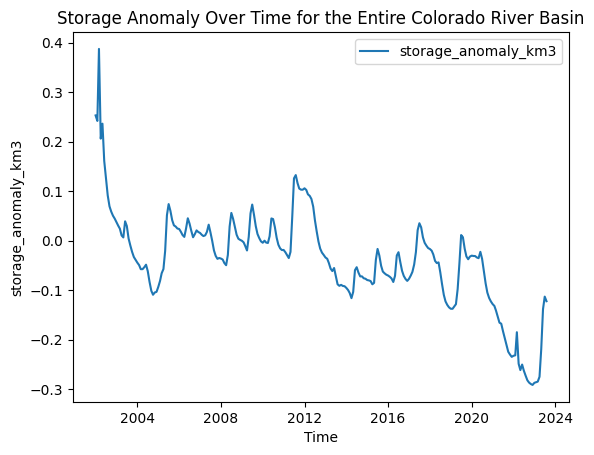

In [27]:
# We can also plot the change in surface water anomaly over the entire Colorado River Basin
averaged_df = storage_df.copy()
averaged_df = averaged_df.groupby('time')['storage_anomaly_km3'].mean().reset_index()

# Add label for the line in the plot function
plt.plot('time', 'storage_anomaly_km3', data=averaged_df, label='storage_anomaly_km3')
plt.title('Storage Anomaly Over Time for the Entire Colorado River Basin')
plt.xlabel('Time')
plt.ylabel('storage_anomaly_km3')

# Add a legend
plt.legend()

# Show the plot
plt.show()
